In [91]:
# Importing the required libraries
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import warnings
warnings.filterwarnings('ignore')

In [92]:
# Load the dataset into a pandas dataframe
data = pd.read_csv('E:\P288_Clustering_Project\P288_Group1_Clustering_Project_Excelr\Dataset\IQR.csv')

# Creating a DataFrame with the loaded data
df = pd.DataFrame(data)

# checking the dataframe
df

,CO2 Emissions,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Infant Mortality Rate,Lending Interest,Life Expectancy Female,Life Expectancy Male,...,Population 15-64,Population 65+,Population Total,Tourism Inbound,Tourism Outbound,Birth Rate,Country,Internet Usage,Population 0-14,Population Urban
0,87931.0,26.000,26998.000,5.479006e+10,0.035,60.000,0.0340,0.1000,71.0,67.0,...,0.6190,0.039,3.171945e+07,1.020000e+08,1.930000e+08,0.020,Algeria,0.0,0.3420,0.599
1,9542.0,26.000,7499.000,9.129595e+09,0.034,22.000,0.1075,0.2265,47.0,44.0,...,0.4990,0.025,1.392493e+07,3.400000e+07,1.460000e+08,0.050,Angola,0.0,0.4760,0.324
2,1617.0,26.000,1983.000,2.359122e+09,0.043,15.000,0.0900,0.1200,57.0,53.0,...,0.5170,0.029,6.949366e+06,7.700000e+07,5.000000e+07,0.043,Benin,0.0,0.4540,0.383
3,4276.0,26.000,1836.000,5.788312e+09,0.047,152.000,0.0540,0.1550,52.0,49.0,...,0.5870,0.029,1.755375e+06,2.270000e+08,2.090000e+08,0.027,Botswana,0.0,0.3830,0.532
4,1041.0,26.000,14338.000,2.610959e+09,0.051,12.000,0.0960,0.1200,52.0,49.0,...,0.5050,0.028,1.160794e+07,2.300000e+07,3.000000e+07,0.046,Burkina Faso,0.0,0.4680,0.178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,8529.0,26.000,14338.000,1.507975e+10,0.061,193.000,0.0200,0.1200,75.0,69.0,...,0.6425,0.052,3.242700e+04,6.885000e+08,4.560000e+08,0.020,Turks and Caicos Islands,0.1,0.2995,0.911
2700,8529.0,5.000,46913.625,2.213750e+11,0.118,1291.125,0.0060,0.0330,81.0,76.0,...,0.6670,0.136,4.903473e+07,6.341000e+09,4.058250e+09,0.013,United States,0.8,0.1960,0.811
2701,8529.0,7.000,14338.000,5.000435e+10,0.089,1291.125,0.0100,0.1120,80.0,74.0,...,0.6390,0.140,3.395253e+06,2.222000e+09,1.028000e+09,0.015,Uruguay,0.5,0.2200,0.948
2702,8529.0,55.625,14338.000,2.213750e+11,0.046,593.000,0.0130,0.1640,78.0,72.0,...,0.6520,0.060,2.995478e+07,9.040000e+08,3.202000e+09,0.020,"Venezuela, RB",0.5,0.2880,0.889


In [93]:
df.columns

Index(['CO2 Emissions', 'Days to Start Business', 'Energy Usage', 'GDP',
       'Health Exp % GDP', 'Health Exp/Capita', 'Infant Mortality Rate',
       'Lending Interest', 'Life Expectancy Female', 'Life Expectancy Male',
       'Mobile Phone Usage', 'Population 15-64', 'Population 65+',
       'Population Total', 'Tourism Inbound', 'Tourism Outbound', 'Birth Rate',
       'Country', 'Internet Usage', 'Population 0-14', 'Population Urban'],
      dtype='object')

In [94]:
# Assuming 'Country' is the categorical column
numerical_cols = df.columns[df.dtypes != 'object']

# Apply sqrt to the numerical columns of the DataFrame
df_normalized = df[numerical_cols].apply(np.sqrt)


In [95]:
# Function to check if a column is symmetric
def is_symmetric(column):
    skewness = column.skew()
    return abs(skewness) < 0.1

# Apply the function to each numeric column in the DataFrame
symmetry_check = df.select_dtypes(include=[np.number]).apply(is_symmetric)

print(symmetry_check)

CO2 Emissions             False
Days to Start Business    False
Energy Usage              False
GDP                       False
Health Exp % GDP          False
Health Exp/Capita         False
Infant Mortality Rate     False
Lending Interest          False
Life Expectancy Female    False
Life Expectancy Male      False
Mobile Phone Usage        False
Population 15-64          False
Population 65+            False
Population Total          False
Tourism Inbound           False
Tourism Outbound          False
Birth Rate                False
Internet Usage            False
Population 0-14            True
Population Urban           True
dtype: bool


In [96]:
# K-Means
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_normalized)
labels_kmeans = kmeans.labels_
print("K-Means labels:")
print(labels_kmeans)

# Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=3)
labels_agg = agg.fit_predict(df_normalized)
print("\nAgglomerative Clustering labels:")
print(labels_agg)

# DBSCAN
dbscan = DBSCAN(eps=0.3)
labels_dbscan = dbscan.fit_predict(df_normalized)
print("\nDBSCAN labels:")
print(labels_dbscan)


K-Means labels:
[2 0 0 ... 2 1 0]

Agglomerative Clustering labels:
[1 0 0 ... 1 2 0]

DBSCAN labels:
[-1 -1 -1 ... -1 -1 -1]


In [97]:
from sklearn.cluster import KMeans
import plotly.graph_objects as go

sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(df_normalized)
    sse.append(km.inertia_)

fig = go.Figure(data=go.Scatter(x=list_k, y=sse, mode='lines+markers'))
fig.update_layout(title='Elbow Method', xaxis_title='Number of clusters k', yaxis_title='Sum of squared distance')
fig.show()


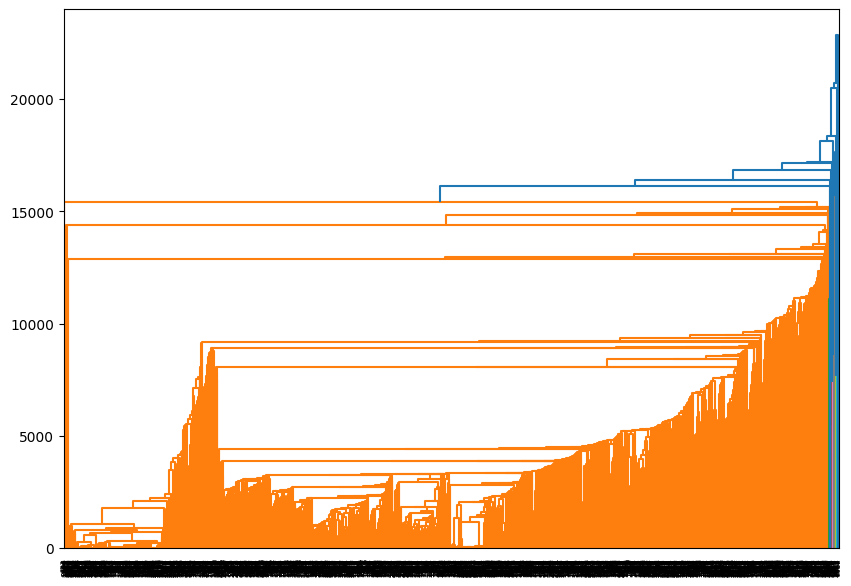

In [98]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

linked = linkage(df_normalized, 'single')

plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.show()


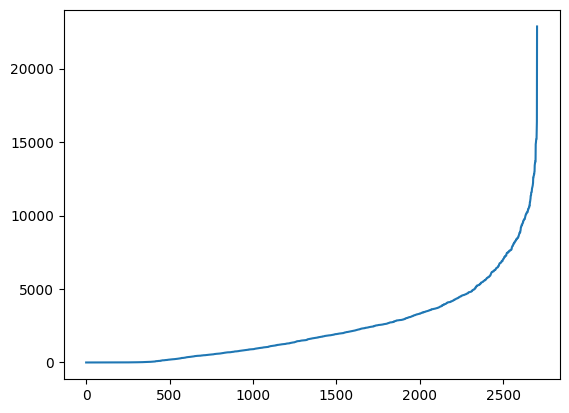

In [99]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df_normalized)
distances, indices = nbrs.kneighbors(df_normalized)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)


In [100]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn import metrics

# Assuming 'df_normalized' is your DataFrame

# K-Means
kmeans = KMeans(n_clusters=5)
labels_kmeans = kmeans.fit_predict(df_normalized)

# Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=4)
labels_agg = agg.fit_predict(df_normalized)

# DBSCAN
dbscan = DBSCAN(eps=0.9)
labels_dbscan = dbscan.fit_predict(df_normalized)

# Calculate metrics
for name, labels in zip(['K-Means', 'Agglomerative', 'DBSCAN'], [labels_kmeans, labels_agg, labels_dbscan]):
    print(f"\n{name}:")
    print(f"Silhouette Score: {metrics.silhouette_score(df_normalized, labels)}")
    print(f"Calinski-Harabasz Index: {metrics.calinski_harabasz_score(df_normalized, labels)}")
    print(f"Davies-Bouldin Index: {metrics.davies_bouldin_score(df_normalized, labels)}")



K-Means:
Silhouette Score: 0.581310994286265
Calinski-Harabasz Index: 22236.7320077464
Davies-Bouldin Index: 0.5633057033152067

Agglomerative:
Silhouette Score: 0.5388514462924943
Calinski-Harabasz Index: 15680.437697858477
Davies-Bouldin Index: 0.5492002685376738

DBSCAN:
Silhouette Score: -0.576612190898979
Calinski-Harabasz Index: 79.66854942791124
Davies-Bouldin Index: 1.1962458897779922


In [101]:
wss=[]
for i in range(2,6):
  k_means=KMeans(n_clusters=i,init='random',n_init='auto',algorithm='lloyd')
  k_means.fit(df_normalized)
  wss.append(k_means.inertia_)
  print(metrics.silhouette_score(df_normalized,k_means.labels_))

0.7527538832604252
0.6376133571726594
0.5879534315444852
0.581310994286265


In [102]:
met={'euclidean', 'yule', 'braycurtis', 'dice', 'chebyshev',
       'jaccard', 'canberra', 'russellrao', 'l2',
      'manhattan', 'rogerstanimoto',
     'cityblock', 'l1', 'haversine', 'sqeuclidean', 'hamming', 'cosine',
     'sokalsneath', 'sokalmichener'}
score=0
for met in met:
  hc=AgglomerativeClustering(n_clusters=2,metric=met,linkage='single')
  y_hc=hc.fit_predict(df_normalized)
  y=metrics.silhouette_score(df_normalized,y_hc)
  if(score<y):
    score=y
    print("for {} metrics ".format(met)+" "+"sil score is {} ".format(metrics.silhouette_score(df_normalized,y_hc)))

In [103]:
linkage = [ 'complete', 'average', 'single']
met=['euclidean','canberra','braycurtis','chebyshev','manhattan']
score=0
for met in met:
  for link in linkage:
    hc=AgglomerativeClustering(n_clusters=3,metric=met,linkage=link)
    y_hc=hc.fit_predict(df_normalized)
    y=metrics.silhouette_score(df_normalized,y_hc)
    if(score<y):
     score=y
     print(link)
     print("for {} metrics ".format(met)+" "+"sil score is {} ".format(metrics.silhouette_score(df_normalized,y_hc)))

complete
for euclidean metrics  sil score is 0.5253971900380692 
average
for euclidean metrics  sil score is 0.66495568115347 
average
for chebyshev metrics  sil score is 0.6696913074923421 


In [104]:
score=0
for clus in range(2,10):
  hc=AgglomerativeClustering(n_clusters=clus,metric='chebyshev',linkage='average')
  y_hc=hc.fit_predict(df_normalized)
  y=metrics.silhouette_score(df_normalized,y_hc)
  if(score<y):
    score=y
  print("for {} cluster ".format(clus)+" "+"sil score is {} ".format(metrics.silhouette_score(df_normalized,y_hc)))

for 2 cluster  sil score is 0.7026797055591117 
for 3 cluster  sil score is 0.6696913074923421 
for 4 cluster  sil score is 0.596539135991085 
for 5 cluster  sil score is 0.5768312023192417 
for 6 cluster  sil score is 0.5504213027086101 
for 7 cluster  sil score is 0.5361130578720593 
for 8 cluster  sil score is 0.5045032018540614 
for 9 cluster  sil score is 0.4947112344005011 


In [105]:
epsl=[0.3,0.4,0.5,0.8,0.9]
score=0
for ep in epsl:
  for sample in range(2,12):
    dbscan=DBSCAN(eps=ep,min_samples=sample)
    dbscan.fit(df_normalized)
    if(score < metrics.silhouette_score(df_normalized,dbscan.labels_)):
      score=metrics.silhouette_score(df_normalized,dbscan.labels_)
      print(str("for eps {} ".format(ep))+str("and  min_sample {} ".format(sample))+" silhouette score is {}" .format(metrics.silhouette_score(df_normalized,dbscan.labels_)))

for eps 0.3 and  min_sample 6  silhouette score is 0.27984017837768294
for eps 0.4 and  min_sample 7  silhouette score is 0.29033682988809295
for eps 0.5 and  min_sample 7  silhouette score is 0.29604838455789384
for eps 0.8 and  min_sample 8  silhouette score is 0.30523482409467695
for eps 0.9 and  min_sample 8  silhouette score is 0.30794340907426404


In [106]:
kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit_predict(df_normalized)
# Add the cluster labels to the dataframe as a new feature
df['Cluster'] = clusters

print(df.head())

   CO2 Emissions  Days to Start Business  Energy Usage           GDP  \
0        87931.0                    26.0       26998.0  5.479006e+10   
1         9542.0                    26.0        7499.0  9.129595e+09   
2         1617.0                    26.0        1983.0  2.359122e+09   
3         4276.0                    26.0        1836.0  5.788312e+09   
4         1041.0                    26.0       14338.0  2.610959e+09   

   Health Exp % GDP  Health Exp/Capita  Infant Mortality Rate  \
0             0.035               60.0                 0.0340   
1             0.034               22.0                 0.1075   
2             0.043               15.0                 0.0900   
3             0.047              152.0                 0.0540   
4             0.051               12.0                 0.0960   

   Lending Interest  Life Expectancy Female  Life Expectancy Male  ...  \
0            0.1000                    71.0                  67.0  ...   
1            0.2265         

In [107]:
import plotly.express as px

# Assuming that df is your DataFrame and it includes a 'Cluster' column
fig = px.scatter(df, x=df.index, y='Cluster', color='Cluster')
fig.show()


In [108]:
import plotly.graph_objects as go

# Filter the DataFrame based on the cluster
cluster0 = df[df['Cluster'] == 0]
cluster1 = df[df['Cluster'] == 1]
cluster2 = df[df['Cluster'] == 2]
cluster3 = df[df['Cluster'] == 3]
cluster4 = df[df['Cluster'] == 4]

# Create a table for each cluster
fig0 = go.Figure(data=[go.Table(header=dict(values=list(cluster0.columns)),
                 cells=dict(values=[cluster0[col] for col in cluster0.columns]))])
fig0.show()

fig1 = go.Figure(data=[go.Table(header=dict(values=list(cluster1.columns)),
                 cells=dict(values=[cluster1[col] for col in cluster1.columns]))])
fig1.show()

fig2 = go.Figure(data=[go.Table(header=dict(values=list(cluster2.columns)),
                 cells=dict(values=[cluster2[col] for col in cluster2.columns]))])
fig2.show()

fig3 = go.Figure(data=[go.Table(header=dict(values=list(cluster3.columns)),
                 cells=dict(values=[cluster3[col] for col in cluster3.columns]))])
fig3.show()

fig4 = go.Figure(data=[go.Table(header=dict(values=list(cluster4.columns)),
                 cells=dict(values=[cluster4[col] for col in cluster4.columns]))])
fig4.show()


In [109]:
import plotly.graph_objects as go

# Filter the DataFrame based on the cluster
cluster0 = df[df['Cluster'] == 0]['Country']
cluster1 = df[df['Cluster'] == 1]['Country']
cluster2 = df[df['Cluster'] == 2]['Country']
cluster3 = df[df['Cluster'] == 3]['Country']
cluster4 = df[df['Cluster'] == 4]['Country']

# Create a table for each cluster
fig0 = go.Figure(data=[go.Table(header=dict(values=['Country']),
                 cells=dict(values=[cluster0]))])
fig0.show()

fig1 = go.Figure(data=[go.Table(header=dict(values=['Country']),
                 cells=dict(values=[cluster1]))])
fig1.show()

fig2 = go.Figure(data=[go.Table(header=dict(values=['Country']),
                 cells=dict(values=[cluster2]))])
fig2.show()

fig3 = go.Figure(data=[go.Table(header=dict(values=['Country']),
                 cells=dict(values=[cluster3]))])
fig3.show()

fig4 = go.Figure(data=[go.Table(header=dict(values=['Country']),
                 cells=dict(values=[cluster4]))])
fig4.show()


In [110]:
import plotly.express as px

# Count the number of countries in each cluster
cluster_counts = df['Cluster'].value_counts().sort_values(ascending=False)

# Create a bar plot
fig = px.bar(cluster_counts, x=cluster_counts.index, y=cluster_counts.values, labels={'x':'Cluster', 'y':'Count'})
fig.show()


In [111]:
import plotly.express as px

# Count the number of countries in each cluster
country_counts = df.groupby('Cluster')['Country'].nunique()

# Create a bar plot
fig = px.bar(country_counts, x=country_counts.index, y=country_counts.values, labels={'x':'Cluster', 'y':'Count'})
fig.show()


In [112]:
# Assuming 'Country' is the categorical column
numerical_cols = df.columns[df.dtypes != 'object'].values

# Calculate the mean value of each numerical feature for each cluster
cluster_characteristics = df.groupby('Cluster')[numerical_cols].mean()

print(cluster_characteristics)


         CO2 Emissions  Days to Start Business  Energy Usage           GDP  \
Cluster                                                                      
0         67444.964286               26.875638  31004.439413  1.092050e+11   
1          3156.785143               30.051143   9798.088000  2.410696e+09   
2         71879.477358               22.554245  39470.322406  2.135383e+11   
3         12296.047970               30.153444  11052.886378  1.436308e+10   
4         33611.084483               27.791810  16694.597845  4.488119e+10   

         Health Exp % GDP  Health Exp/Capita  Infant Mortality Rate  \
Cluster                                                               
0                0.054954         493.417730               0.021406   
1                0.062126         193.614571               0.044426   
2                0.074898         862.482075               0.012779   
3                0.059339         274.488776               0.035089   
4                0.059872  

In [113]:
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming you have a DataFrame 'df' with 'features'
X = df_normalized

# Perform KMeans clustering
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
df['cluster_labels'] = kmeans.labels_

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_normalized, df['cluster_labels'], test_size=0.3)

# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100)

# Train the model using the training sets
clf.fit(X_train, y_train)

# Evaluate the model on the test set
accuracy = clf.score(X_test, y_test)
print(f"Model accuracy: {accuracy}")

# Now you can predict the cluster for new data
def predict_cluster(new_data):
    # new_data is a 2D array-like object with features
    predicted_cluster = clf.predict(new_data)
    return predicted_cluster


Model accuracy: 0.9864532019704434


- Cluster 0: This cluster has countries with relatively high CO2 emissions, GDP, and energy usage. The average days to start a business is around 23. The health expenditure as a percentage of GDP is around 0.075 and the average health expenditure per capita is 862. The infant mortality rate is relatively low at 0.013 and the lending interest is 0.096. The life expectancy for females and males is 79 and 73 years respectively.

- Cluster 1: This cluster represents countries with lower CO2 emissions, GDP, and energy usage compared to Cluster 0. The average days to start a business is around 30. The health expenditure as a percentage of GDP is lower at 0.059 and the average health expenditure per capita is significantly lower at 275. The infant mortality rate is higher at 0.035 and the lending interest is higher at 0.130. The life expectancy for females and males is lower than Cluster 0 at around 70 and 65 years respectively.

- Cluster 2: This cluster represents countries with even lower CO2 emissions, GDP, and energy usage compared to Cluster 1. The average days to start a business is similar to Cluster 1 at around 30. The health expenditure as a percentage of GDP is slightly higher than Cluster 1 at around 0.062 and the average health expenditure per capita is lower than both Clusters 0 and 1 at around 193. The infant mortality rate is higher than both Clusters 0 and 1 at around 0.044 and the lending interest is the highest among all clusters at around .144 . The life expectancy for females and males are significantly lower than other clusters at around 66 and 62 years respectively.

- Cluster 3: This cluster represents countries with high CO2 emissions, GDP, and energy usage but lower than Cluster 0. The average days to start a business is around 30 which is higher than Cluster 0 but similar to others. The health expenditure as a percentage of GDP is the lowest among all clusters at around .051 and the average health expenditure per capita is relatively low at around 237 which is higher than Clusters 1 and 2 but lower than Cluster 0. The infant mortality rate is relatively low at around .026 which is higher than Cluster 0 but lower than others, and the lending interest rate is slightly higher than Clusters 0 and 1 but lower than Clusters2 at around .125 . The life expectancy for females and males are similar to Cluster1.

- Cluster4: This cluster represents countries with low CO2 emissions, GDP, and energy usage similar to Clusters1 but slightly higher on average. The average days to start a business is around similar to others at around .28 which is higher than Clusters0 but lower than others. The health expenditure as a percentage of GDP is slightly lower than Clusters1 at around .060 and the average health expenditure per capita is relatively low at around .182 which is higher than Clusters2 but lower than others. The infant mortality rate is relatively low at around .026 which is similar to Clusters3 but lower than others, and the lending interest rate is slightly higher than others except for Clusters2 at around .140 . The life expectancy for females and males are similar to Clusters3.

In [114]:
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming you have a DataFrame 'df' with 'features'
X = df_normalized

# Perform KMeans clustering
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
df['cluster_labels'] = kmeans.labels_

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_normalized, df['cluster_labels'], test_size=0.2)

# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100)

# Train the model using the training sets
clf.fit(X_train, y_train)

# Evaluate the model on the test set
accuracy = clf.score(X_test, y_test)
print(f"Model accuracy: {accuracy}")

# Now you can predict the cluster for new data
def predict_cluster(new_data):
    # new_data is a 2D array-like object with features
    predicted_cluster = clf.predict(new_data)
    return predicted_cluster


Model accuracy: 0.9926062846580407


In [115]:
df

,CO2 Emissions,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Infant Mortality Rate,Lending Interest,Life Expectancy Female,Life Expectancy Male,...,Population Total,Tourism Inbound,Tourism Outbound,Birth Rate,Country,Internet Usage,Population 0-14,Population Urban,Cluster,cluster_labels
0,87931.0,26.000,26998.000,5.479006e+10,0.035,60.000,0.0340,0.1000,71.0,67.0,...,3.171945e+07,1.020000e+08,1.930000e+08,0.020,Algeria,0.0,0.3420,0.599,4,4
1,9542.0,26.000,7499.000,9.129595e+09,0.034,22.000,0.1075,0.2265,47.0,44.0,...,1.392493e+07,3.400000e+07,1.460000e+08,0.050,Angola,0.0,0.4760,0.324,3,2
2,1617.0,26.000,1983.000,2.359122e+09,0.043,15.000,0.0900,0.1200,57.0,53.0,...,6.949366e+06,7.700000e+07,5.000000e+07,0.043,Benin,0.0,0.4540,0.383,1,0
3,4276.0,26.000,1836.000,5.788312e+09,0.047,152.000,0.0540,0.1550,52.0,49.0,...,1.755375e+06,2.270000e+08,2.090000e+08,0.027,Botswana,0.0,0.3830,0.532,1,0
4,1041.0,26.000,14338.000,2.610959e+09,0.051,12.000,0.0960,0.1200,52.0,49.0,...,1.160794e+07,2.300000e+07,3.000000e+07,0.046,Burkina Faso,0.0,0.4680,0.178,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,8529.0,26.000,14338.000,1.507975e+10,0.061,193.000,0.0200,0.1200,75.0,69.0,...,3.242700e+04,6.885000e+08,4.560000e+08,0.020,Turks and Caicos Islands,0.1,0.2995,0.911,3,2
2700,8529.0,5.000,46913.625,2.213750e+11,0.118,1291.125,0.0060,0.0330,81.0,76.0,...,4.903473e+07,6.341000e+09,4.058250e+09,0.013,United States,0.8,0.1960,0.811,2,1
2701,8529.0,7.000,14338.000,5.000435e+10,0.089,1291.125,0.0100,0.1120,80.0,74.0,...,3.395253e+06,2.222000e+09,1.028000e+09,0.015,Uruguay,0.5,0.2200,0.948,4,4
2702,8529.0,55.625,14338.000,2.213750e+11,0.046,593.000,0.0130,0.1640,78.0,72.0,...,2.995478e+07,9.040000e+08,3.202000e+09,0.020,"Venezuela, RB",0.5,0.2880,0.889,2,1


In [116]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_normalized, df['cluster_labels'], test_size=0.3)

# standardize the features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# define models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model
for name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(f'{name}: {accuracy_score(y_test, predictions)}')


LR: 0.9359605911330049
LDA: 0.9716748768472906
KNN: 0.8669950738916257
CART: 0.9901477832512315
NB: 0.8780788177339901
SVM: 0.9236453201970444


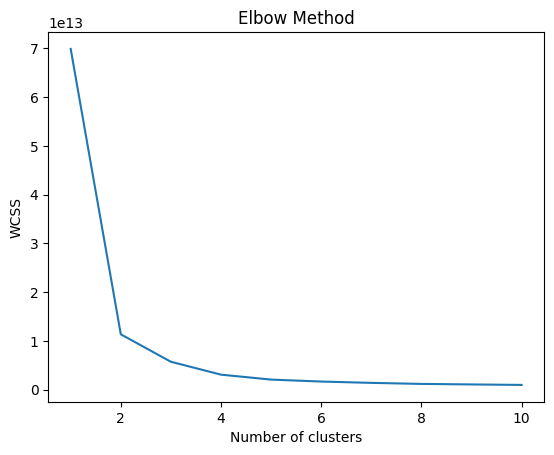

In [117]:
X = df_normalized

# Use the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [118]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib

# Assuming you have a dataset with 100 samples and 20 features
X, y = make_classification(n_samples=100, n_features=20, random_state=42)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100)

# Train the model using the training sets
clf.fit(X_train, y_train)

# Save the model to disk
filename = 'finalized_model.sav'
joblib.dump(clf, filename)

# Load the model from disk
loaded_model = joblib.load(filename)

# Now you can predict the class for new data
def predict_class(new_data):
    # new_data is a 2D array-like object with features
    predicted_class = loaded_model.predict(new_data)
    return predicted_class

predict_cluster(X_new)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [119]:
import pandas as pd

# Define the data
data = {
    'Birth Rate': [0.02, 0.05, 0.043, 0.027, 0.046, 0.042, 0.041, 0.039, 0.051, 0.039],
    'CO2 Emissions': [87931, 9542, 1617, 4276, 1041, 301, 3432, 268, 176, 84],
    'Country': ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros'],
    'Days to Start Business': [26]*10,
    'Energy Usage': [26998, 7499, 1983, 1836, 14338]*2,
    'GDP': [54790058957, 9129594819, 2359122303, 5788311645, 2610959139]*2,
    'Health Exp % GDP': [0.035, 0.034, 0.043, 0.047, 0.051]*2,
    'Health Exp/Capita': [60 ,22 ,15 ,152 ,12]*2,
    'Infant Mortality Rate': [0.034 ,0.128 ,0.09 ,0.054 ,0.096]*2,
    'Internet Usage': [0]*10,
    'Lending Interest': [0.1 ,1.032 ,0.12 ,0.155 ,0.12]*2,
    'Life Expectancy Female': [71 ,47 ,57 ,52 ,52]*2,
    'Life Expectancy Male': [67 ,44 ,53 ,49 ,49]*2,
    'Mobile Phone Usage': [0]*10,
    'Population 0-14': [0.342 ,0.476 ,0.454 ,0.383 ,0.423]*2,
    'Population 15-64': [0.619 ,0.499 ,0.517 ,0.587 ,0.537]*2,
    'Population 65+': [0.039 ,0.025 ,0.029 ,0.029 ,0.04]*2,
    'Population Total': [31719449 ,13924930 ,6949366 ,1755375 ,3638316]*2,
    'Population Urban': [0.599 ,0.324 ,0.383 ,0.532 ,0.376]*2,
    'Tourism Inbound': [102000000 ,34000000 ,77000000 ,227000000 ,50000000]*2,
    'Tourism Outbound': [193000000 ,146000000 ,50000000 ,209000000 ,33000000]*2
}

# Convert the data into a DataFrame
df = pd.DataFrame(data)

# Print the DataFrame
print(df)


   Birth Rate  CO2 Emissions                   Country  \
0       0.020          87931                   Algeria   
1       0.050           9542                    Angola   
2       0.043           1617                     Benin   
3       0.027           4276                  Botswana   
4       0.046           1041              Burkina Faso   
5       0.042            301                   Burundi   
6       0.041           3432                  Cameroon   
7       0.039            268  Central African Republic   
8       0.051            176                      Chad   
9       0.039             84                   Comoros   

   Days to Start Business  Energy Usage          GDP  Health Exp % GDP  \
0                      26         26998  54790058957             0.035   
1                      26          7499   9129594819             0.034   
2                      26          1983   2359122303             0.043   
3                      26          1836   5788311645             

In [120]:

# Assuming 'Country' is the categorical column
numerical_cols = df.columns[df.dtypes != 'object']

# Apply sqrt to the numerical columns of the DataFrame
df_normalized = df[numerical_cols].apply(np.sqrt)


# Extract the features from the DataFrame
X_new = df_normalized # replace 'features' with your actual features

# Use the model to make predictions
predictions = clf.predict(X_new)

# Print the predictions
print(predictions)


[1 1 1 1 1 1 1 1 1 1]
